# Homework 5

1. Choose a corpus of interest. 
2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way). 
3. Taking the most common words, how many unique words represent half of the total words in the corpus? 
4. Identify the 200 highest frequency words in this corpus. 
5. Create a graph that shows the relative frequency of these 200 words. 
6. Does the observed relative frequency of these words follow Zipf’s law?  Explain. 
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” 

In [151]:
import pandas as pd
import nltk
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [3]:
training_data = pd.read_csv('training_data.csv')

In [5]:
training_data.head()

,Content,Source Name,Source URL
0,Yes. An analysis of crashes in LA in 2022 show...,Yes on HLA,https://yesonhla.com/
1,Measure HLA will mandate safety improvements o...,Yes on HLA,https://yesonhla.com/
2,The Mobility Plan was designed to make streets...,Yes on HLA,https://yesonhla.com/
3,The Mobility Plan's original environmental doc...,Yes on HLA,https://yesonhla.com/
4,"No. Currently, the City of Los Angeles has $70...",Yes on HLA,https://yesonhla.com/


In [10]:
word_list = []
for i in range(len(training_data)):
    content = training_data.loc[i,'Content']
    tokens = content.split(" ")
    word_list = word_list + tokens

In [12]:
tokens = set(word_list)

In [14]:
len(tokens)

783

In [21]:
fdist1 = nltk.FreqDist(word_list)

In [36]:
word_dist = [item for item in fdist1.items()]

    

In [38]:
word_dist_df = pd.DataFrame(word_dist)

In [42]:
word_dist_df.columns = ['token','frequency']

In [79]:
word_dist_df_sorted = word_dist_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

In [51]:
import numpy as np

In [80]:
word_dist_df_sorted['cum_freq'] = np.cumsum(word_dist_df_sorted['frequency'])

In [81]:
word_dist_df_sorted['cum_pct'] = word_dist_df_sorted.apply(lambda x: round(x['cum_freq']/len(word_list),3),axis=1)

In [82]:
word_dist_df_sorted.query('cum_pct < .501')

,token,frequency,cum_freq,cum_pct
0,the,77,77,0.046
1,of,54,131,0.078
2,to,44,175,0.104
3,and,36,211,0.125
4,in,23,234,0.139
...,...,...,...,...
84,movement,3,827,0.492
85,2035,3,830,0.493
86,It,3,833,0.495
87,less,3,836,0.497


In [76]:
word_dist_df_sorted.iloc[:200,:]

,token,frequency,cum_freq,pct_words
0,the,77,77,0.046
1,of,54,131,0.078
2,to,44,175,0.104
3,and,36,211,0.125
4,in,23,234,0.139
...,...,...,...,...
195,quick,2,1081,0.643
196,majority,2,1083,0.644
197,showed,2,1085,0.645
198,"plan,",2,1087,0.646


In [85]:
word_dist_df_sorted['pct_freq'] = word_dist_df_sorted.apply(lambda x: x['frequency']/len(word_list),axis=1)

In [88]:
word_dist_df_sorted.iloc[:200,:]

,token,frequency,cum_freq,cum_pct,pct_freq
0,the,77,77,0.046,0.045779
1,of,54,131,0.078,0.032105
2,to,44,175,0.104,0.026159
3,and,36,211,0.125,0.021403
4,in,23,234,0.139,0.013674
...,...,...,...,...,...
195,quick,2,1081,0.643,0.001189
196,majority,2,1083,0.644,0.001189
197,showed,2,1085,0.645,0.001189
198,"plan,",2,1087,0.646,0.001189


In [110]:

word_dist_df_sorted['token2'] = pd.Categorical(word_dist_df_sorted.token, categories=pd.unique(word_dist_df_sorted.token))

In [113]:
word_dist_df_sorted.dtypes

token          object
frequency       int64
cum_freq        int64
cum_pct       float64
pct_freq      float64
token2       category
dtype: object

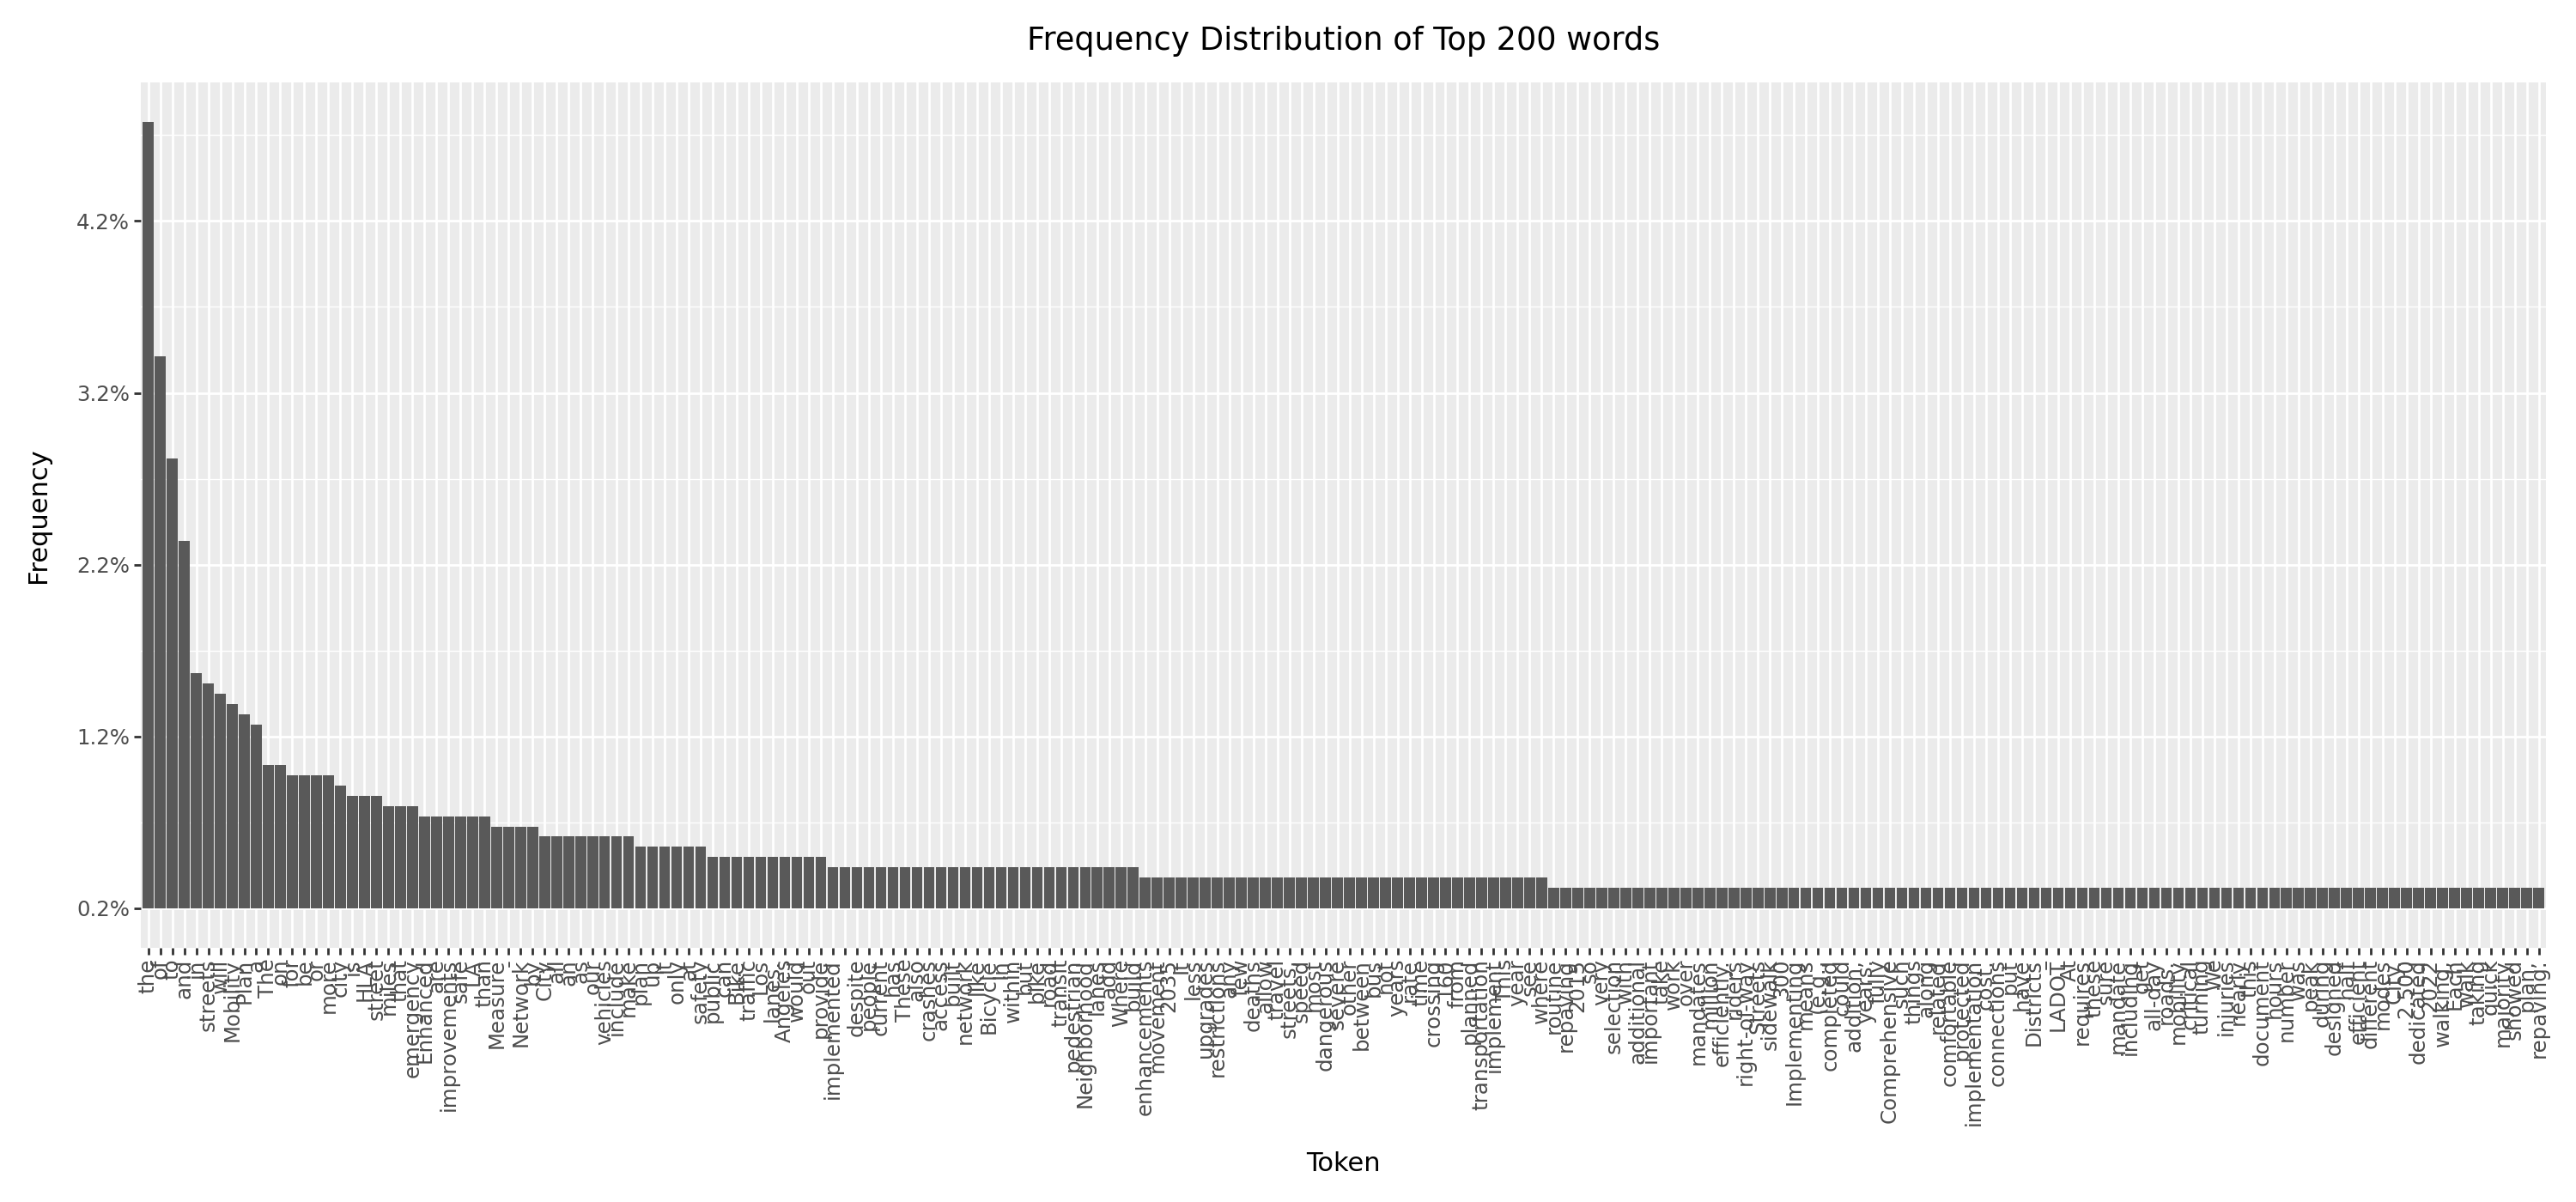

In [130]:
(
    ggplot(word_dist_df_sorted.iloc[:200,:])
    + aes(x='token2',y='pct_freq')
    + geom_bar(stat='identity')
    + theme(axis_text_x=element_text(rotation=90),figure_size=(15,7))
    + labs(title="Frequency Distribution of Top 200 words",x='Token', y='Frequency')
    + scale_y_continuous(labels = lambda x: ["%d.2%%" % (pct_freq * 100) for pct_freq in x])
)

In [135]:
text = " ".join(word_list)

In [136]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

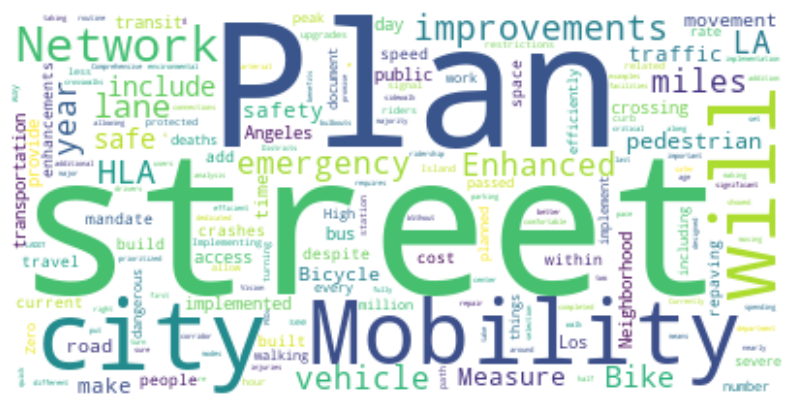

In [150]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Conclusion